<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/ML_Project_On_Drinking_water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Potability of Drinking Water

In [ ]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing Dataset
water_data = pd.read_csv('drinking_water_potability.csv')

In [ ]:
water_data.head(7) #preview of data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0


In [ ]:
water_data.isnull().sum()   # Null values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Handling the Null values

In [ ]:
null= ['ph','Sulfate','Trihalomethanes']

D:\Applications\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

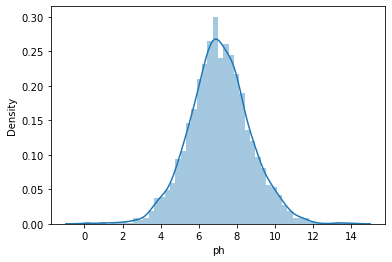

In [ ]:
sns.distplot(water_data['ph'])

In [ ]:
water_data['ph'] = water_data['ph'].replace(np.nan, water_data.ph.mean())  # replace the null values with mean ph values

D:\Applications\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

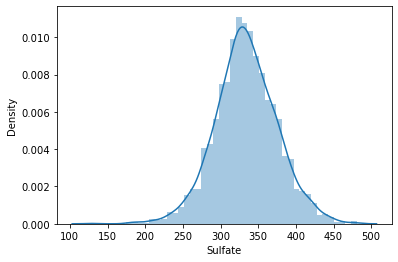

In [ ]:
sns.distplot(water_data['Sulfate'])

In [ ]:
water_data['Sulfate'] = water_data['Sulfate'].replace(np.nan, water_data.Sulfate.mean())  # replace the null values with mean Sulfate values

D:\Applications\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Density'>

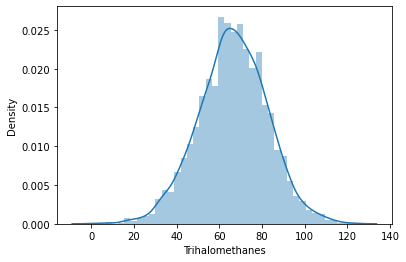

In [ ]:
sns.distplot(water_data['Trihalomethanes'])

In [ ]:
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].replace(np.nan, water_data.Trihalomethanes.mean())  # replace the null values with mean Trihalomethanes values

In [ ]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
water_data.head(7)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0


#### Feature Engineering

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X = water_data.drop(['Potability'],axis=1)
Y = water_data.Potability
Ext = ExtraTreesClassifier()
Ext.fit(X,Y)

ExtraTreesClassifier()

In [ ]:
print(Ext.feature_importances_)  # importance of features

[0.12794432 0.117694   0.11248536 0.1122355  0.12622165 0.10150067
 0.10038101 0.10129034 0.10024716]


<AxesSubplot:>

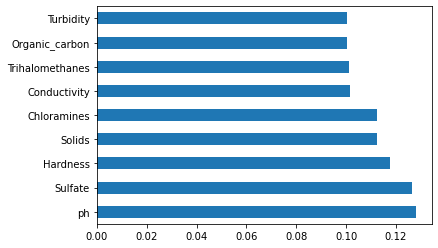

In [ ]:
feature = pd.Series(Ext.feature_importances_,index=X.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')  # visualization of features in terms of their importance

#### Standadization of data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

scaled_water_data = pd.DataFrame(X_scaled, columns= X.columns)
scaled_water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.027333e-14,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,1.415694e-14,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,1.415694e-14,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786


### ML Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.25, random_state = 0)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
pred1 = lr.predict(X_test)

#### SVM 

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
pred2 = svm.predict(X_test)

#### Random Forest  Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10 ,random_state=0)
rf.fit(X_train, Y_train)
pred3 = rf.predict(X_test)

### Testing Models

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
cm = confusion_matrix(Y_test, pred1)
print(cm)

[[501   1]
 [317   0]]


In [ ]:
cm_2 = confusion_matrix(Y_test, pred2)
print(cm_2)

[[501   1]
 [317   0]]


In [ ]:
cm_3 = confusion_matrix(Y_test, pred3)
print(cm_3)

[[444  58]
 [213 104]]


In [ ]:
models=pd.DataFrame({
    'Model':['Logistic Regression', 'SVM', 'Random Forest Classification'],
    'Accuracy Score':[accuracy_score(Y_test, pred1), accuracy_score(Y_test, pred2), accuracy_score(Y_test, pred3)]
})
models.sort_values(by ='Accuracy Score', ascending=False)

,Model,Accuracy Score
2,Random Forest Classification,0.669109
0,Logistic Regression,0.611722
1,SVM,0.611722
